# WEB SCRAPING

Il web scraping (detto anche web harvesting o web data extraction) è una tecnica informatica di estrazione di dati da un sito web per mezzo di programmi software. Di solito, tali programmi simulano la navigazione umana nel World Wide Web utilizzando l'Hypertext Transfer Protocol (HTTP) o attraverso browser, come Internet Explorer o Mozilla Firefox.

[Fonte Wikipedia](https://it.wikipedia.org/wiki/Web_scraping)

In [ ]:
import pandas as pd
import numpy as np


import requests
from bs4 import BeautifulSoup

# **N.B.**
Il nome del pacchetto da installare via pip è *beautifulsoup4*.

Il nome *beautifulsoup* indica la vecchia versione.



```bash
pip install beautifulsoup4
```



# **LIBRERIE**



***request:*** libreria python per effettuare chiamate hhttp. [tutorial](https://www.programmareinpython.it/blog/requests-http-gli-esseri-umani-tutorial-python-ita/)

**beautifulsoup:** Libreria python per il parsing di pagine html e xml [documentazione](https://readthedocs.org/projects/beautiful-soup-4/downloads/pdf/latest/)


# **HELLO WORLD**

In [ ]:
"""
DOWNLOAD DELLA PAGINA WEB
"""
hello_world_page = "https://it.wikipedia.org/wiki/Hello_world"
hello_world_request = requests.get(hello_world_page)

"""
Creazione dell'oggetto BeautifulSoup.
Ricordarsi di convertire l'oggetto di "request"
in una stringa di testo.
"""
hello_world_soup = BeautifulSoup(hello_world_request.text)




 - **BeautifulSoup.find()**

- **BeautifulSoup.find_all()**


Metodi  che effettuano la ricerca di uno o più elementi descritti da determinati tag html.






In [ ]:

# cerca la classe associata al tag "h1" che contiente il titolo della pagina
hello_world_title = hello_world_soup.find("h1", class_ = "firstHeading")
print(f"HTML:\n {hello_world_title}\n")
print(f"Title:\n {hello_world_title.get_text()}\n")

HTML:
 <h1 class="firstHeading mw-first-heading" id="firstHeading"><span class="mw-page-title-main">Hello world</span></h1>

Title:
 Hello world



 - **BeautifulSoup.select()**

 Metodo per la selezione di elementi della pagina tramite selettore css


In [ ]:
# riporta tutta la gerarchia legata alla lista che va
# da li.toclevel-1 a li.toclevel-n
hello_world_links = hello_world_soup.select("li.toclevel-1")

In [ ]:
print(hello_world_links)

[<li class="toclevel-1 tocsection-1"><a href="#Storia"><span class="tocnumber">1</span> <span class="toctext">Storia</span></a></li>, <li class="toclevel-1 tocsection-2"><a href="#Esempi"><span class="tocnumber">2</span> <span class="toctext">Esempi</span></a>
<ul>
<li class="toclevel-2 tocsection-3"><a href="#BASIC"><span class="tocnumber">2.1</span> <span class="toctext">BASIC</span></a></li>
<li class="toclevel-2 tocsection-4"><a href="#Bash"><span class="tocnumber">2.2</span> <span class="toctext">Bash</span></a></li>
<li class="toclevel-2 tocsection-5"><a href="#Batch"><span class="tocnumber">2.3</span> <span class="toctext">Batch</span></a></li>
<li class="toclevel-2 tocsection-6"><a href="#C"><span class="tocnumber">2.4</span> <span class="toctext">C</span></a></li>
<li class="toclevel-2 tocsection-7"><a href="#C++"><span class="tocnumber">2.5</span> <span class="toctext">C++</span></a></li>
<li class="toclevel-2 tocsection-8"><a href="#C#"><span class="tocnumber">2.6</span> <sp

In [ ]:
# get(tag) restistuisce un particolare elemento
# dell'oggetto html individuato da una ricerca
for link in hello_world_links:
    print(link.a.get("href"))

#Storia
#Esempi
#Note
#Bibliografia
#Voci_correlate
#Altri_progetti
#Collegamenti_esterni


In [ ]:
for link in hello_world_links:
    print(link.a.get_text())

1 Storia
2 Esempi
3 Note
4 Bibliografia
5 Voci correlate
6 Altri progetti
7 Collegamenti esterni


- **BeautifulSoup.next_sibiling**

l'oggetto oggetto next_sibiling permett di visitare gli elementi di una pagina html in base alle reazioni gerarchiche.

In [ ]:
html_1 = """\
<div>
 <label>Nome:</label>
 Mario Rossi
</div>
"""

html_1_soap = BeautifulSoup(html_1, "html.parser")
html_1_label = html_1_soap.find("label", string="Nome:")

# strip() restituisce una copia "ripulita"
# di elementi come gli spazi bianchi ad inizio e fine stringhe
print(html_1_label.next_sibling.strip())

Mario Rossi


# **ESEMPIO ESTRAZIONE DATI**

In [ ]:

# ===================
# download pagina web
# ===================
wiki_url = "https://it.wikipedia.org/wiki/Demografia_d%27Italia"
pagina_wikipedia = requests.get(wiki_url).text


# ==============================
# BeautifulSoup object
# ==============================
soup = BeautifulSoup(pagina_wikipedia, 'html.parser')


# ==========================================================
# recupero delle sezioni della pagina web con il tag "tabel"
# ==========================================================
tabelle = soup.find_all('table')
# for t in tabelle:
#     print(t.get('class'))




# ==============================
# creazione di un oggetto pandas
# ==============================
data_list = pd.read_html(str(tabelle[2]))
df = pd.DataFrame(data_list[0])
display(df)


Anno  Popolazione 1º gennaio          Natalità  \
                 Anno  Popolazione 1º gennaio              Nati   
0                1862              26.328.000           991.000   
1                1863              26.507.000         1.026.000   
2                1864              26.712.000         1.000.000   
3                1865              26.915.000         1.024.000   
4                1866              27.131.000         1.044.000   
..                ...                     ...               ...   
161              2023              58.997.201           379.339   
162              2024              58.989.749               NaN   
163              Anno  Popolazione 1º gennaio          Natalità   
164              Anno  Popolazione 1º gennaio              Nati   
165  * = dati stimati        * = dati stimati  * = dati stimati   

                              Mortalità                      Saldo naturale  \
            Tasso (‰)             Morti         Tasso (‰)    Saldo naturale   
0                 375           815.000               309          +176.000   
1                 386           824.000               310          +202.000   
2                 373           802.000               299          +198.000   
3                 379           812.000               300          +212.000   
4                 383           798.000               293          +246.000   
..                ...               ...               ...               ...   
161                64           660.600               111          -281.261   
162               NaN               NaN               NaN               NaN   
163          Natalità         Mortalità         Mortalità    Saldo naturale   
164         Tasso (‰)             Morti         Tasso (‰)    Saldo naturale   
165  * = dati stimati  * = dati stimati  * = dati stimati  * = dati stimati   

    Tasso di fecondità totale[14][29]  
    Tasso di fecondità totale[14][29]  
0                                 493  
1                                 490  
2                                 490  
3                                 491  
4                                 491  
..                                ...  
161                               120  
162                               NaN  
163         Tasso di fecondità totale  
164         Tasso di fecondità totale  
165                  * = dati stimati  

[166 rows x 8 columns]

In [ ]:

# ====================================
# estrazione dati in forma di stringhe
# ====================================
anno_str        = df['Anno']['Anno'].to_numpy()[:-4]
popolazione_str = df["Popolazione 1º gennaio"]["Popolazione 1º gennaio"].to_numpy()[:-4]
nati_str        = df["Natalità"]["Nati"].to_numpy()[:-4]
morti_str       = df["Mortalità"]["Morti"].to_numpy()[:-4]


In [ ]:


# =================================================================
# In questo caso le stringhe che descrivono i valori usano il punto
# come separatore per le migliaia ed è necessario elimiarlo
# prima di convertire in interi
# =================================================================
def conversione_stringhe_interi(data_str: np.array(str)) -> np.array(np.int64):
  data = np.zeros_like(data_str)

  for i in range(data_str.size):
    data[i] = np.int64( data_str[i].replace('.', '') )
  return data

def conversione_anni(data_str: np.array(str)) -> np.array(np.int64):
  anni  = np.zeros_like(data_str)
  a0 = 1862
  for i in range(anni.size):
    anni[i] = a0
    a0 += 1
  return anni

anni        = conversione_anni(anno_str)
popolazione = conversione_stringhe_interi(popolazione_str)
nati        = conversione_stringhe_interi(nati_str)
morti       = conversione_stringhe_interi(morti_str)


# ===============================
# creazione di un nuovo dataframe
# ===============================
demo_df = pd.DataFrame(index = range(anni.size),  columns=['anno', 'nati', 'morti', "popolazione"]).fillna(0)
demo_df['anno'] = anni
demo_df['nati'] = nati
demo_df['morti'] = morti
demo_df['popolazione'] = popolazione


# ===========================================
# creazione di un nuovo file csv
# ===========================================
demo_df.to_csv('demo_italia_1862_2021.csv')
display(demo_df)





,anno,nati,morti,popolazione
0,1862,991000,815000,26328000
1,1863,1026000,824000,26507000
2,1864,1000000,802000,26712000
3,1865,1024000,812000,26915000
4,1866,1044000,798000,27131000
...,...,...,...,...
157,2019,420084,634417,59816673
158,2020,404892,740317,59641488
159,2021,400249,701346,59236213
160,2022,393333,715077,59030133


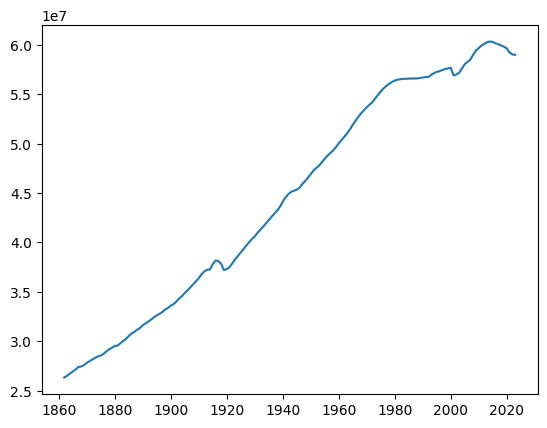

In [ ]:
import matplotlib.pyplot as plt

plt.plot(demo_df["anno"], demo_df["popolazione"])
plt.show()